In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
pd.set_option('display.max_columns', None)

In [3]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


# Data Preprocessing (Initial Stage)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [6]:
#creating a new feature named brand by taking the first word of 'Name' feature
train['Brand']=train['Name'].str.split().str[0]

In [7]:
train['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [8]:
#ISUZU and Isuzu exist.so replace it with Isuzu
train['Brand'].replace({'ISUZU':'Isuzu'},inplace=True)

In [9]:
#showing no.of distinct brands
train['Brand'].nunique()

30

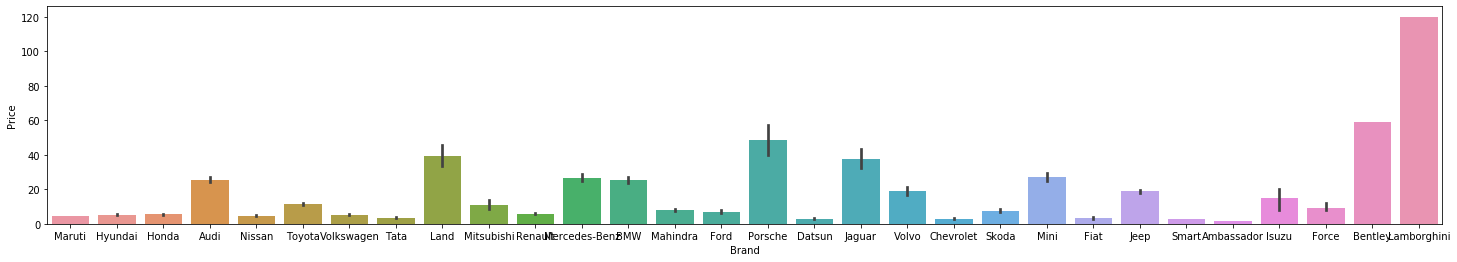

In [10]:
plt.figure(figsize=(25,4))
sns.barplot(x=train.Brand,y=train.Price,data=train)

In [11]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [12]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
dtype: int64

In [13]:
train=train.drop_duplicates()

In [14]:
train.drop(train[train.Kilometers_Driven>=600000].index,inplace=True)

In [15]:
train.drop(columns=['Name'],axis=1, inplace=True)

In [16]:
train.dtypes.value_counts()

object     8
int64      2
float64    2
dtype: int64

In [17]:
import datetime as dt
train['Year'] = train['Year'].apply(lambda year: dt.datetime.now().year - year)

In [18]:
train['Year']

0       10
1        5
2        9
3        8
4        7
        ..
6014     6
6015     5
6016     8
6017     7
6018     9
Name: Year, Length: 6015, dtype: int64

In [19]:
train['Mileage']=train['Mileage'].str.rstrip('kmplkm/kg').astype('float')

In [20]:
train['Mileage']

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 6015, dtype: float64

In [21]:
train['Power']=train['Power'].str.rstrip('bhp')
train['Power']= pd.to_numeric(train['Power'],errors='coerce')

In [22]:
train['Power']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 6015, dtype: float64

In [23]:
train['Engine']=train['Engine'].str.rstrip('CC').astype('float')

In [24]:
train['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6015, dtype: float64

In [25]:
train.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Brand                  0
dtype: int64

In [26]:
train['Mileage'].fillna(train['Mileage'].astype('float').mean(), inplace = True)
train['Power'].fillna(train['Power'].astype('float').mean(), inplace = True)
train['Engine'].fillna(train['Engine'].astype('float').mean(), inplace = True)
train['Seats'].fillna(train['Seats'].astype('float').mean(), inplace = True)

In [27]:
train.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64

In [28]:
cols=['Year','Kilometers_Driven']
train[cols]=train[cols].astype(float)

In [29]:
train.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Brand'],
      dtype='object')

In [30]:
train = pd.get_dummies(train,columns=['Location', 'Brand', 'Fuel_Type', 'Transmission', 'Owner_Type'],drop_first = True)

In [31]:
train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,10.0,72000.0,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5.0,41000.0,19.67,1582.0,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,9.0,46000.0,18.20,1199.0,88.70,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,8.0,87000.0,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,7.0,40670.0,15.20,1968.0,140.80,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [32]:
train.shape

(6015, 54)

## Scaling

In [33]:
train=train.reset_index(drop=True)

In [34]:
# As scaled dataset is required by specific models
df_scaled = train.copy()

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaling=MinMaxScaler()

In [37]:
df_scaled[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']]=scaling.fit_transform(df_scaled[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']])

In [38]:
df_scaled.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0.428571,0.149697,0.793083,0.156261,0.045569,0.5,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.190476,0.085091,0.586464,0.254809,0.174971,0.5,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0.380952,0.095511,0.542636,0.190179,0.103652,0.5,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0.333333,0.180958,0.619261,0.198448,0.103766,0.7,6.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0.285714,0.084403,0.453190,0.319946,0.202739,0.5,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## Splitting data for Model training

In [39]:
col=train.pop('Price')
train['Price']=col
col=df_scaled.pop('Price')
df_scaled['Price']=col

In [40]:
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values
X_sc = df_scaled.iloc[:,:-1].values
y_sc = df_scaled.iloc[:,-1].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
X_sc_train, X_sc_test, y_sc_train, y_sc_test = train_test_split(X_sc, y_sc, test_size=0.3, random_state=50)

# Model Training and Evaluation

## Ridge Regression

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_sc_train,y_sc_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [43]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-26.589584719118697


In [44]:
y_pred_ridge=ridge_regressor.predict(X_sc_test)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
print('mse:',mean_squared_error(y_sc_test,y_pred_ridge))
print('r^2:',r2_score(y_sc_test,y_pred_ridge)*100)

mse: 33.19315127589568
r^2: 75.21973854170385


## Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_sc_train,y_sc_train)
print(lasso_regressor.best_params_)

{'alpha': 1e-15}


In [47]:
y_pred_lasso=lasso_regressor.predict(X_sc_test)

In [48]:
print('mse:',mean_squared_error(y_sc_test,y_pred_lasso))
print('r^2:',r2_score(y_sc_test,y_pred_lasso)*100)

mse: 33.19177324463849
r^2: 75.22076730738408


## Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
class CustomRandomForest:
    
    def __init__(self):
        
        self.regressor = RandomForestRegressor()

    def tune_parameters(self, X_train, y_train):
        
        parameters = {'n_estimators': [75, 100, 200, 250], 
                      'max_depth': [5, 10, 15, 20],
                      'max_features': ['auto', 'sqrt', 'log2'],
                      'min_samples_leaf': [1, 2, 5, 10]}
        
        regressor_ = GridSearchCV(self.regressor, parameters, cv=5, n_jobs=-1)
        regressor_.fit(X_train, y_train)
        
        self.best_parameters = regressor_.best_params_
        self.best_score = regressor_.best_score_
        
        print('Best parameters : {}'.format(self.best_parameters))
        print('Best score : {}'.format(self.best_score))
    
    def fit(self, X_train, y_train):
        
        self.regressor = RandomForestRegressor(n_estimators = self.best_parameters['n_estimators'], 
                                               max_depth = self.best_parameters['max_depth'],
                                               max_features = self.best_parameters['max_features'],
                                               min_samples_leaf = self.best_parameters['min_samples_leaf'])
        
        self.model = self.regressor.fit(X_train, y_train)
        
    def predict(self, X_test):
        
        y_pred = self.model.predict(X_test)
        return y_pred
    
    def evaluate(self, y_test, y_pred):
        
        r2_rf = r2_score(y_test, y_pred)*100
        mse_rf = mean_squared_error(y_test, y_pred)
        
        scores = [['R2 Score', r2_rf],
                  ['Mean Squared Error', mse_rf]]
        df = pd.DataFrame(scores, columns=['Metrics', 'Score'])
        return df

In [51]:
regressor = CustomRandomForest()

### Hyperparameter tuning

In [52]:
regressor.tune_parameters(X_train, y_train)

Best parameters : {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 200}
Best score : 0.9060311500490702


In [53]:
regressor.fit(X_train, y_train)

In [54]:
y_pred = regressor.predict(X_test)

In [55]:
df = regressor.evaluate(y_test, y_pred)
df

,Metrics,Score
0,R2 Score,86.111943
1,Mean Squared Error,18.603047
